# Exploratory Data Analysis

In [ ]:
from pathlib import Path
from dygnn.dataset.utils import extract_keys

FILE_PATH = Path("dygnn/dataset/raw_data") / "dblp_v14.json"
N = 10000000
YEAR_START = 2010

### Dataframe creation

Create a dataframe from the json file. Each row represent a paper.

In [2]:
print(f"Creating the initial dataframe from {FILE_PATH}...")
df = extract_keys(file_path=FILE_PATH, N=N, year_start=YEAR_START)
print("Done!")
print(f"Dataframe shape: {df.shape}")
print(f"Dataframe columns: {df.columns}\n")
display(df.head())

Creating the initial dataframe from dygnn/dataset/raw_data/dblp_v14.json...


Processing JSON Data:  53%|█████▎    | 5259858/10000000 [08:58<08:05, 9759.10it/s]  


Done!
Dataframe shape: (3393757, 11)
Dataframe columns: Index(['id', 'title', 'keywords', 'year', 'n_citation', 'abstract', 'doc_type',
       'author_ids', 'author_names', 'author_orgs', 'references'],
      dtype='object')



,id,title,keywords,year,n_citation,abstract,doc_type,author_ids,author_names,author_orgs,references
59,53e9a098b7602d970297d668,Étude comparative pour la modélisation de plat...,[],2010,0,,Journal,"[53f42ca8dabfaeb2acfdfc06, 53f47925dabfaee4dc8...","[Matthias Brun, Jérôme Delatour, Yvon Trinquet...","[, , , , ]",NaN
58,53e9a081b7602d97029672c6,A Covering Lemma for HOD of K(R),"[descriptive set theory, determinacy, fine str...",2010,0,"Working in ZF + AD alone, we prove that every ...",Journal,[53f434aedabfaedce551f0d4],[Daniel W. Cunningham],[],NaN
12,53e997e8b7602d9701fe1281,Bidirectionalizing graph transformations,"[bidirectional transformation, graph query and...",2010,132,Bidirectional transformations provide a novel ...,Conference,"[54327639dabfaeb4ea4f2cc3, 53f37a6cdabfae4b349...","[Soichiro Hidaka, Zhenjiang Hu, Kazuhiro Inaba...","[National Institute of Informatics, Tokyo, Jap...","[53e99a4eb7602d97022b43f7, 53e997e8b7602d9701f..."
14,53e997f8b7602d9701ffd7fe,Homogeneous family sharing,"[family inheritance, shadow classes, views]",2010,4,Recent work has introduced class sharing as a ...,Conference,"[5610ea6145cedb339782199f, 5440a71bdabfae7d84b...","[Xin Qi, Andrew C. Myers]","[Facebook Inc., Palo Alto, CA, USA, Cornell Un...","[53e9aa4fb7602d97033bcc88, 53e99a0fb7602d97022..."
50,53e99db8b7602d9702678921,A Reflection on the Security Proofs of Boneh-F...,[],2010,0,Boneh and Franklin constructed the first pract...,Journal,[53f4339edabfaedce5512e20],[Yu Chen],[Institute of Software|School of Electronics E...,"[53e9a635b7602d9702f65a31, 53e9ae17b7602d97038..."


#### Number of papers published each year

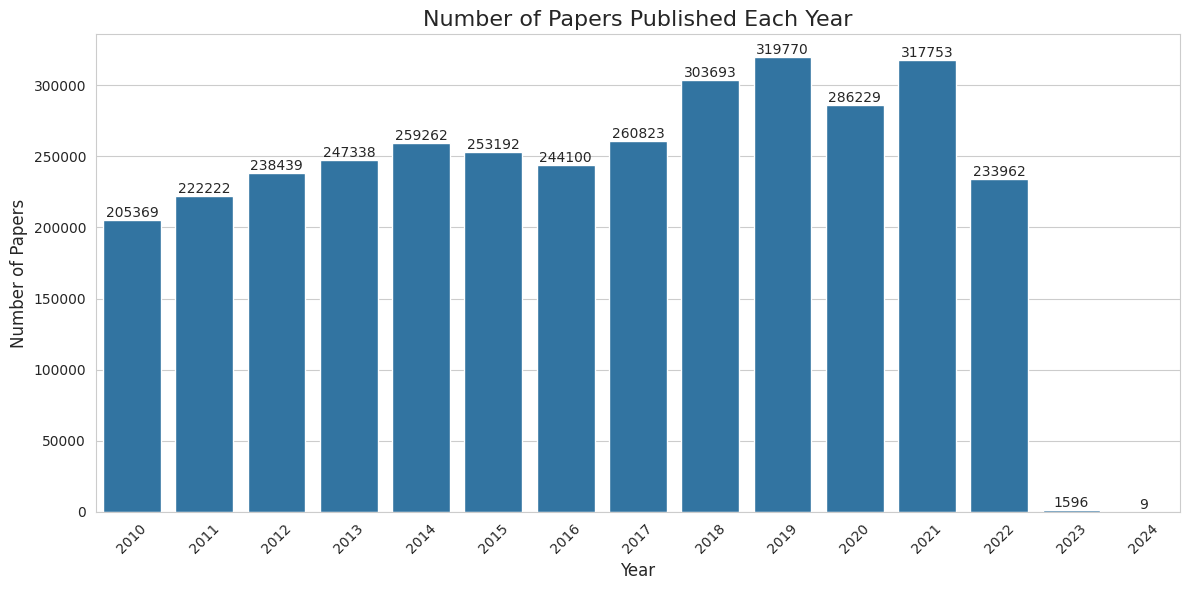

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Count the number of papers for each year
year_counts = df["year"].value_counts().sort_index()

# Create a DataFrame from the counts
year_counts_df = pd.DataFrame(year_counts).reset_index()
year_counts_df.columns = ["year", "number_of_papers"]

# Create a directory to store the bar plot
output_dir = Path("images")
output_dir.mkdir(parents=True, exist_ok=True)

# Set the style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot with custom colors
ax = sns.barplot(
    data=year_counts_df,
    x="year",
    y="number_of_papers",
    legend=False,
)

# Customize the plot
plt.title("Number of Papers Published Each Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels on top of the bars
for i, v in enumerate(year_counts_df["number_of_papers"]):
    ax.text(i, v, str(v), ha="center", va="bottom")

# Save the bar plot image
bar_plot_file_path = output_dir / "number_of_papers_per_year.png"
plt.savefig(bar_plot_file_path, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

#### Paper's citation distribution

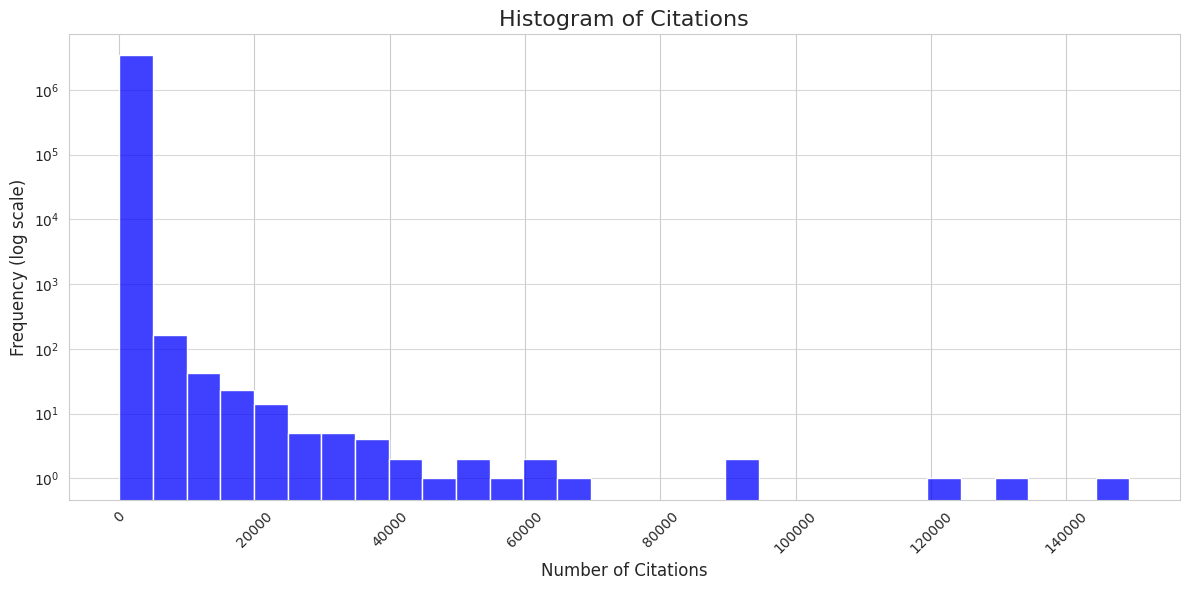

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Create a directory to store the histogram
output_dir = Path("images")
output_dir.mkdir(parents=True, exist_ok=True)

# Set the style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the histogram
ax = sns.histplot(df["n_citation"], bins=30, kde=False, color="blue")

# Set the y-axis to a logarithmic scale
plt.yscale("log")

# Customize the plot
plt.title("Histogram of Citations", fontsize=16)
plt.xlabel("Number of Citations", fontsize=12)
plt.ylabel("Frequency (log scale)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines for better visibility
plt.grid(axis="y", alpha=0.75)

# Save the histogram image
histogram_file_path = output_dir / "histogram_of_citations.png"
plt.savefig(histogram_file_path, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

#### Paper type proportions

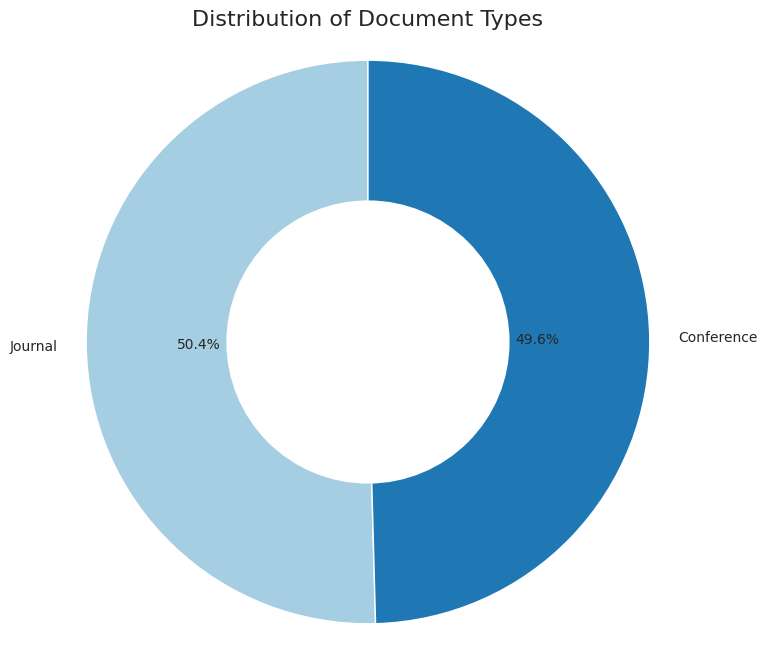

In [68]:
import matplotlib.pyplot as plt
from pathlib import Path

# Create a directory to store the pie charts
output_dir = Path("images")
output_dir.mkdir(parents=True, exist_ok=True)

# Count the occurrences of each document type
doc_type_counts = df["doc_type"].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))

# Create a pie chart
wedges, texts, autotexts = plt.pie(
    doc_type_counts,
    labels=doc_type_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Paired.colors,
)

# Draw a circle in the center to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.50, fc="white")  # Adjust the radius for the hole
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customize the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Document Types", fontsize=16)

# Save the pie chart image
pie_chart_file_path = output_dir / "doc_type_distribution.png"
plt.savefig(pie_chart_file_path, bbox_inches="tight")
plt.show()

#### Wordcloud visualization for each year

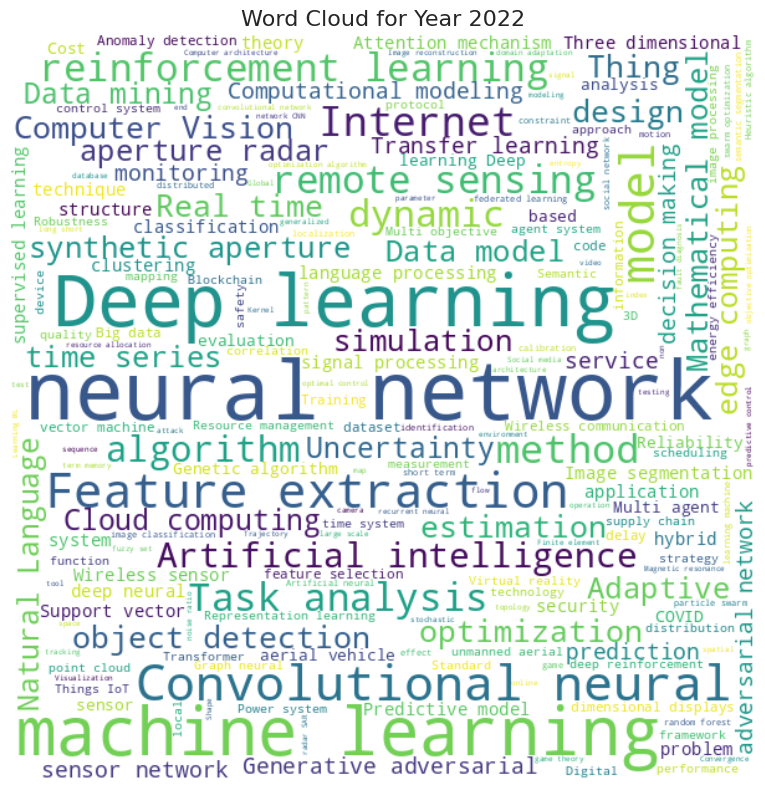

In [63]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pathlib import Path

# Ensure the 'year' column is of integer type
df["year"] = df["year"].astype(int)

# Create a directory to store the word clouds
output_dir = Path("images")
output_dir.mkdir(parents=True, exist_ok=True) 

# Get unique years from the DataFrame
years = df["year"].unique()

# Create a word cloud for each year
for year in years[:-1]:
    # Filter the DataFrame for the current year
    year_df = df[df["year"] == year]

    # Flatten the list of keywords and combine them into a single string
    keywords = " ".join(
        [keyword for sublist in year_df["keywords"].dropna() for keyword in sublist]
    )

    # Generate the word cloud with square dimensions
    wordcloud = WordCloud(width=600, height=600, background_color="white").generate(
        keywords
    )

    # Plot the word cloud
    plt.figure(figsize=(8, 8))  # Maintain square aspect ratio for the plot
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes

    # Set a more fitting title
    plt.title(f"Word Cloud for Year {year}", fontsize=16)

    plt.tight_layout()

    # Save the word cloud image
    wordcloud_file_path = output_dir / f"wordcloud_{year}.png"
    wordcloud.to_file(wordcloud_file_path)

    if year == 2022:
        plt.show()